In [1]:
#import library
import pandas as pd
import numpy as np
import re
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import the clean dataset
df=pd.read_csv('./mudah_property_clean.csv')

In [3]:
df.head()

,Area,Price,Bedroom,Bathroom,Type,SquareFeet,Title,Oth_Info,Carpark,Facilities,State
0,OUG,3999000,8,8,Houses,7000,Freehold,Non Bumi Lot,0,No Facilities,Kuala Lumpur
1,Desa ParkCity,3300000,4,3,Houses,2379,Freehold,Non Bumi Lot,0,"Swimming Pool, Gymnasium, Playground, Jogging ...",Kuala Lumpur
2,Wangsa Maju,590000,4,2,Apartments,1065,Leasehold,Non Bumi Lot,2,"Swimming Pool, Gymnasium, Playground, Jogging ...",Kuala Lumpur
3,Wangsa Maju,590000,4,2,Apartments,1065,Leasehold,Non Bumi Lot,2,"Swimming Pool, Gymnasium, Playground, Jogging ...",Kuala Lumpur
4,Ampang Hilir,460000,2,2,Apartments,743,Leasehold,Non Bumi Lot,1,"Swimming Pool, Gymnasium, Tennis Court, Squash...",Kuala Lumpur


# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, visualize the data**

In [4]:
#rows and columns
df.shape

(38439, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38439 entries, 0 to 38438
Data columns (total 11 columns):
Area          38439 non-null object
Price         38439 non-null int64
Bedroom       38439 non-null int64
Bathroom      38439 non-null int64
Type          38439 non-null object
SquareFeet    38439 non-null int64
Title         38439 non-null object
Oth_Info      38439 non-null object
Carpark       38439 non-null int64
Facilities    38439 non-null object
State         38439 non-null object
dtypes: int64(5), object(6)
memory usage: 3.2+ MB


**There is 38,439 instances and 11 variables in the dataset. All columns have 38,439 entries without missing values.**

In [6]:
#summary statistic of continuous variables
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,38439.0,614463.051250,1.226523e+06,750.0,300000.0,430000.0,639000.0,110000000.0
Bedroom,38439.0,3.481022,1.052772e+00,0.0,3.0,3.0,4.0,10.0
Bathroom,38439.0,2.573532,1.153001e+00,0.0,2.0,2.0,3.0,10.0
SquareFeet,38439.0,1817.449335,1.130091e+04,0.0,872.0,1196.0,1750.0,1150000.0
Carpark,38439.0,0.589427,7.963825e-01,0.0,0.0,0.0,1.0,10.0


**Bedroom,bathroom and carpark have the maximum value of 10. There is zero value for square feet, which is not reasonable to have 0 square feet for a property. Besides, there is 0 bedroom and bathroom in the dataset, invalid data entry for bedroom and bathroom. Correction of invalid data will be conducted. For carpark, the median is 0. Thus, we will analyse further the 0 carpark in the dataset. In addition, price has the maximum value of  RM 110,000,000 and square feet has the maximum value of 1,150,000.**

**The zero value for bedroom, bathroom and square feet will be corrected with the median value correspond to their property type**

In [7]:
df.groupby('Type').median()

,Price,Bedroom,Bathroom,SquareFeet,Carpark
Type,,,,,
Apartments,339949.5,3.0,2.0,926.0,1.0
Houses,580000.0,4.0,3.0,1800.0,0.0


**Before replace the zero with median value, we replace the 0 with na for Bedroom, Bathroom and SquareFeet**

In [8]:
df[['Bedroom','Bathroom','SquareFeet']]=df[['Bedroom','Bathroom','SquareFeet']].replace(0,np.nan)

In [9]:
df.isnull().sum()

Area           0
Price          0
Bedroom       25
Bathroom      18
Type           0
SquareFeet     2
Title          0
Oth_Info       0
Carpark        0
Facilities     0
State          0
dtype: int64

**Now bedroom has 25 missing values, bathroom has 18 and 2 for square feet.**

**Replace the missing value with the median corresponding to their type (houses,apartments)**

In [10]:
df['Bedroom'] = df['Bedroom'].fillna(df.groupby('Type')['Bedroom'].transform('median')).astype('int')
df['Bathroom'] = df['Bathroom'].fillna(df.groupby('Type')['Bathroom'].transform('median')).astype('int')
df['SquareFeet'] = df['SquareFeet'].fillna(df.groupby('Type')['SquareFeet'].transform('median')).astype('int')

In [11]:
#check if the missing values are filled
df.isnull().sum()

Area          0
Price         0
Bedroom       0
Bathroom      0
Type          0
SquareFeet    0
Title         0
Oth_Info      0
Carpark       0
Facilities    0
State         0
dtype: int64

In [12]:
#summary statistic of continuous variables after the 0 value is replace with their corresponding median value
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,38439.0,614463.051250,1.226523e+06,750.0,300000.0,430000.0,639000.0,110000000.0
Bedroom,38439.0,3.483441,1.049099e+00,1.0,3.0,3.0,4.0,10.0
Bathroom,38439.0,2.574781,1.151702e+00,1.0,2.0,2.0,3.0,10.0
SquareFeet,38439.0,1817.497516,1.130090e+04,1.0,872.0,1196.0,1750.0,1150000.0
Carpark,38439.0,0.589427,7.963825e-01,0.0,0.0,0.0,1.0,10.0


**No zero values for bedroom, bathroom and square feet. Now, lets check for the carpark.**

In [13]:
df.groupby('Type').describe()['Carpark']

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Apartments,21592.0,1.049324,0.804049,0.0,1.0,1.0,2.0,10.0
Houses,16847.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


**No carpark data for houses type, all carpark data for houses are zero. The carpark data only applicable for apartments. Thus, we will not going to correct the zero value for carpark variable.**

C:\Users\ASUS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


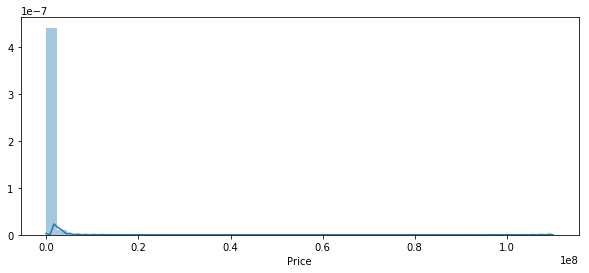

In [14]:
#distribution plot for price
plt.figure(figsize=(10,4))
sns.distplot(df['Price'])

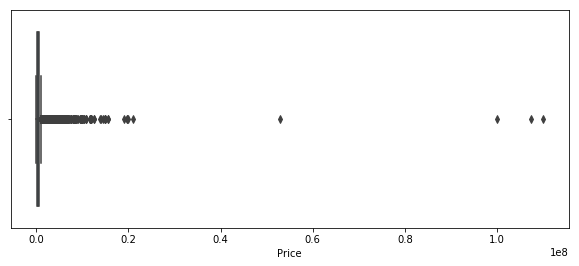

In [15]:
#boxplot for price
plt.figure(figsize=(10,4))
sns.boxplot(x='Price',data=df)

**From the distribution plot and boxplot for price, there is many outliers and is highly skewed to the right. We cant see the min, max, median, 1st quartile and 3rd quartile from the boxplot.**

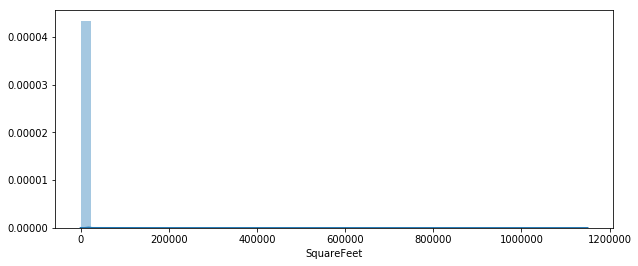

In [16]:
#distribution plot for price
plt.figure(figsize=(10,4))
sns.distplot(df['SquareFeet'])

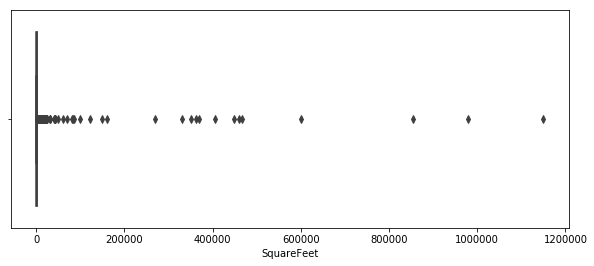

In [17]:
#boxplot for square feet
plt.figure(figsize=(10,4))
sns.boxplot(x='SquareFeet',data=df)

**Same goes to square feet, from the distribution plot and boxplot, there are many outliers and is highly skewed to the right. We cant see the min, max, median, 1st quartile and 3rd quartile from the boxplot.**

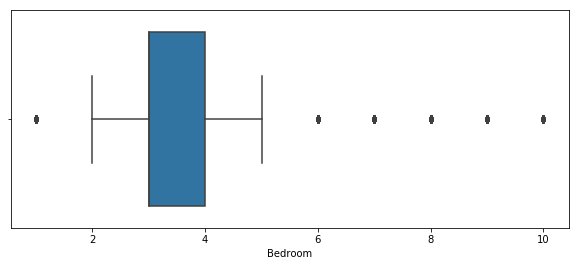

In [18]:
#boxplot for bedroom
plt.figure(figsize=(10,4))
sns.boxplot(x='Bedroom',data=df)

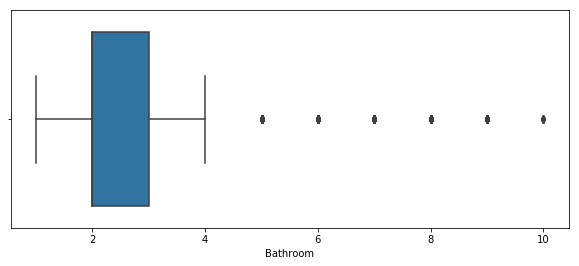

In [19]:
#boxplot for bathroom
plt.figure(figsize=(10,4))
sns.boxplot(x='Bathroom',data=df)

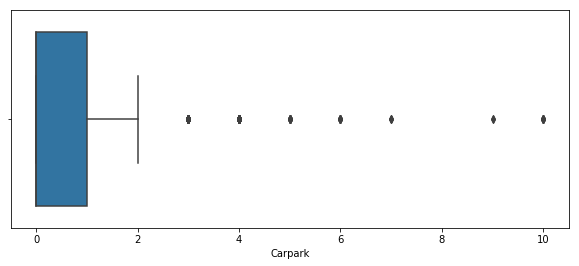

In [20]:
#boxplot for carpark
plt.figure(figsize=(10,4))
sns.boxplot(x='Carpark',data=df)

**Outliers happened in bedroom, bathroom and carpark.**

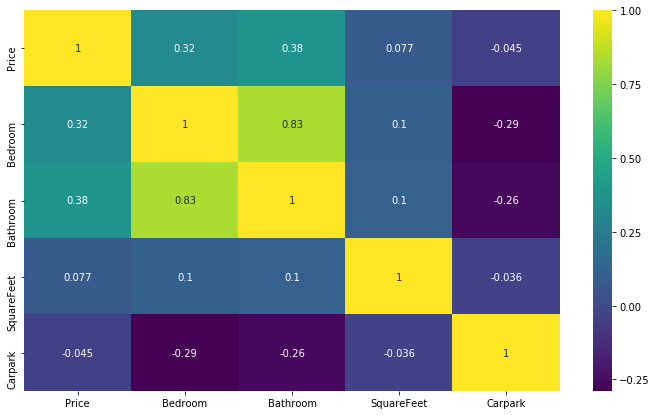

In [21]:
#explore correlation between the continuous variables
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

**From the heatmap above, bedroom and bathroom are highly correlated with each other. However, the correlation between price and square feet is very weak.**

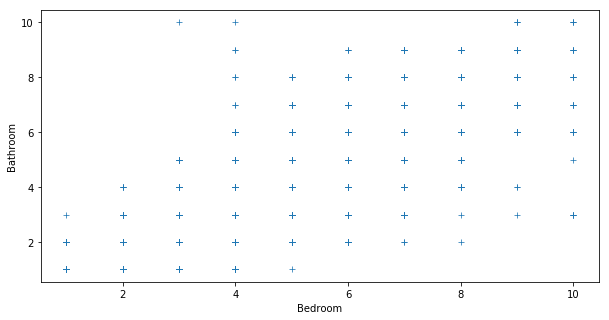

In [22]:
#high correlation between bathroom and bedroom 
#scatterplot for bathroom and bedroom 
plt.figure(figsize=(10,5))
sns.scatterplot(x='Bedroom',y='Bathroom',data=df,marker="+")

**Scatter plot for bedroom and bathroom, show a positive correlation. When the number of bedroom increase, number of bathroom will also increase.**

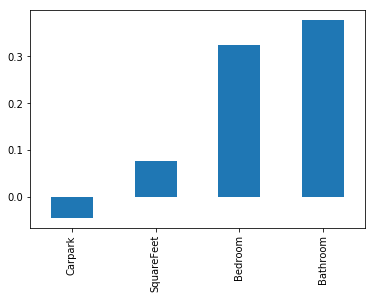

In [23]:
df.corr()['Price'].sort_values().drop('Price').plot(kind='bar')

**From the bar chart above, bathroom and bedroom have moderate correlation with the price. The correlation between square feet and price is the lowest. However, negative correlation between carpark and price. This might due to the 0 value in carpark for houses type.**

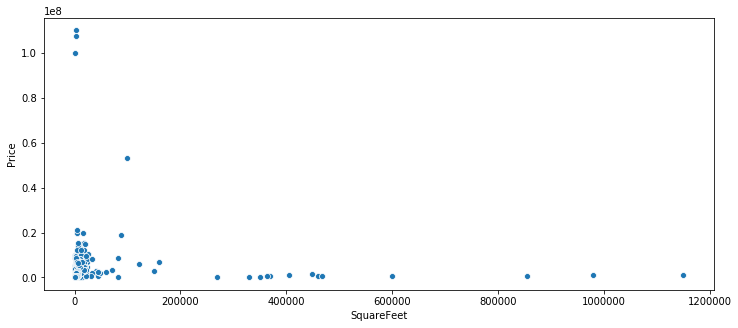

In [24]:
#scatterplot for price and square feet
plt.figure(figsize=(12,5))
sns.scatterplot(x='SquareFeet',y='Price',data=df)

**The scatter plot for square feet and price above cant show any significant insight. This might due to the outliers in square feet and price. Thus, in later part, we will going to remove the outliers.**

**Remove the outliers for 'Price','Bedroom','Bathroom','SquareFeet','Carpark' by using Standard Deviation Method**

In [25]:
#z-score for price,bedroom,bathroom,sqft and carpark
z_scores = stats.zscore(df[['Price','Bedroom','Bathroom','SquareFeet','Carpark']])

abs_z_scores = np.abs(z_scores)
abs_z_scores

array([[2.75949289, 4.30523409, 4.71067346, 0.45859797, 0.74014067],
       [2.18958169, 0.49238951, 0.36921434, 0.04968717, 0.74014067],
       [0.0199453 , 0.49238951, 0.49907749, 0.06658826, 1.77124806],
       ...,
       [0.10147766, 0.46082163, 0.49907749, 0.00597283, 0.74014067],
       [0.2890021 , 0.46082163, 0.49907749, 0.08163151, 0.5155537 ],
       [0.2890021 , 0.46082163, 0.49907749, 0.08163151, 0.5155537 ]])

In [26]:
#create a dataframe for the z scores
df_z=pd.DataFrame({'z-score_price':abs_z_scores[:,0],'z-score_bedroom':abs_z_scores[:,1],
                   'z-score_bathroom':abs_z_scores[:,2],'z-score_sqft':abs_z_scores[:,3],
                  'z-score_carpark':abs_z_scores[:,4]})
df_z.head()

,z-score_price,z-score_bedroom,z-score_bathroom,z-score_sqft,z-score_carpark
0,2.759493,4.305234,4.710673,0.458598,0.740141
1,2.189582,0.492390,0.369214,0.049687,0.740141
2,0.019945,0.492390,0.499077,0.066588,1.771248
3,0.019945,0.492390,0.499077,0.066588,1.771248
4,0.125937,1.414033,0.499077,0.095082,0.515554


In [27]:
#merge the z-score dataframe with the original dataframe
df_new=pd.concat([df,df_z],axis=1)
df_new.head()

,Area,Price,Bedroom,Bathroom,Type,SquareFeet,Title,Oth_Info,Carpark,Facilities,State,z-score_price,z-score_bedroom,z-score_bathroom,z-score_sqft,z-score_carpark
0,OUG,3999000,8,8,Houses,7000,Freehold,Non Bumi Lot,0,No Facilities,Kuala Lumpur,2.759493,4.305234,4.710673,0.458598,0.740141
1,Desa ParkCity,3300000,4,3,Houses,2379,Freehold,Non Bumi Lot,0,"Swimming Pool, Gymnasium, Playground, Jogging ...",Kuala Lumpur,2.189582,0.492390,0.369214,0.049687,0.740141
2,Wangsa Maju,590000,4,2,Apartments,1065,Leasehold,Non Bumi Lot,2,"Swimming Pool, Gymnasium, Playground, Jogging ...",Kuala Lumpur,0.019945,0.492390,0.499077,0.066588,1.771248
3,Wangsa Maju,590000,4,2,Apartments,1065,Leasehold,Non Bumi Lot,2,"Swimming Pool, Gymnasium, Playground, Jogging ...",Kuala Lumpur,0.019945,0.492390,0.499077,0.066588,1.771248
4,Ampang Hilir,460000,2,2,Apartments,743,Leasehold,Non Bumi Lot,1,"Swimming Pool, Gymnasium, Tennis Court, Squash...",Kuala Lumpur,0.125937,1.414033,0.499077,0.095082,0.515554


In [28]:
#z-score higher than 3 will be removed
threshold = 3
df_new=df_new[(df_new['z-score_price']<3)&(df_new['z-score_bedroom']<3)&(df_new['z-score_bathroom']<3)&
      (df_new['z-score_sqft']<3)&(df_new['z-score_carpark']<3)]
df_new.head()

,Area,Price,Bedroom,Bathroom,Type,SquareFeet,Title,Oth_Info,Carpark,Facilities,State,z-score_price,z-score_bedroom,z-score_bathroom,z-score_sqft,z-score_carpark
1,Desa ParkCity,3300000,4,3,Houses,2379,Freehold,Non Bumi Lot,0,"Swimming Pool, Gymnasium, Playground, Jogging ...",Kuala Lumpur,2.189582,0.492390,0.369214,0.049687,0.740141
2,Wangsa Maju,590000,4,2,Apartments,1065,Leasehold,Non Bumi Lot,2,"Swimming Pool, Gymnasium, Playground, Jogging ...",Kuala Lumpur,0.019945,0.492390,0.499077,0.066588,1.771248
3,Wangsa Maju,590000,4,2,Apartments,1065,Leasehold,Non Bumi Lot,2,"Swimming Pool, Gymnasium, Playground, Jogging ...",Kuala Lumpur,0.019945,0.492390,0.499077,0.066588,1.771248
4,Ampang Hilir,460000,2,2,Apartments,743,Leasehold,Non Bumi Lot,1,"Swimming Pool, Gymnasium, Tennis Court, Squash...",Kuala Lumpur,0.125937,1.414033,0.499077,0.095082,0.515554
5,Cheras,300000,3,2,Apartments,748,Leasehold,Bumi Lot,1,"Mini Market, Playground, Jogging Track, 24 Hou...",Kuala Lumpur,0.256389,0.460822,0.499077,0.094639,0.515554


In [29]:
#after remove the outlier, remove the z-score columns 
df_new=df_new.drop(['z-score_price','z-score_bedroom','z-score_bathroom','z-score_sqft','z-score_carpark'],axis=1)
df_new.head()

,Area,Price,Bedroom,Bathroom,Type,SquareFeet,Title,Oth_Info,Carpark,Facilities,State
1,Desa ParkCity,3300000,4,3,Houses,2379,Freehold,Non Bumi Lot,0,"Swimming Pool, Gymnasium, Playground, Jogging ...",Kuala Lumpur
2,Wangsa Maju,590000,4,2,Apartments,1065,Leasehold,Non Bumi Lot,2,"Swimming Pool, Gymnasium, Playground, Jogging ...",Kuala Lumpur
3,Wangsa Maju,590000,4,2,Apartments,1065,Leasehold,Non Bumi Lot,2,"Swimming Pool, Gymnasium, Playground, Jogging ...",Kuala Lumpur
4,Ampang Hilir,460000,2,2,Apartments,743,Leasehold,Non Bumi Lot,1,"Swimming Pool, Gymnasium, Tennis Court, Squash...",Kuala Lumpur
5,Cheras,300000,3,2,Apartments,748,Leasehold,Bumi Lot,1,"Mini Market, Playground, Jogging Track, 24 Hou...",Kuala Lumpur


In [30]:
df_new.shape

(37007, 11)

In [31]:
df_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,37007.0,527964.166698,413209.900482,750.0,299800.0,420000.0,600000.0,4250000.0
Bedroom,37007.0,3.395952,0.895700,1.0,3.0,3.0,4.0,6.0
Bathroom,37007.0,2.472019,0.958169,1.0,2.0,2.0,3.0,6.0
SquareFeet,37007.0,1476.336288,1062.906229,1.0,860.0,1163.0,1650.0,32704.0
Carpark,37007.0,0.564164,0.722126,0.0,0.0,0.0,1.0,2.0


**After the outliers are removed, maximum value for bedroom and bathroom now is 6, and maximum value for carpark is 2. The maximum value for price and square feet are changed too.**

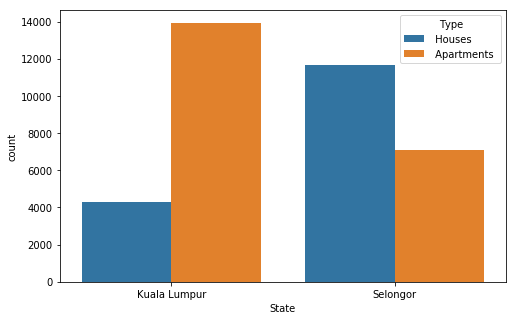

In [32]:
#create a countplot for the state
plt.figure(figsize=(8,5))
sns.countplot(x='State',hue='Type',data=df_new)

**In our dataset, apartments property is higher than houses property in Kuala Lumpur. While, there is more houses property in Selangor compared to apartments.**

In [33]:
#count the number of properties in Kl and Selangor
df_new['State'].value_counts()

Selongor        18763
Kuala Lumpur    18244
Name: State, dtype: int64

**Total 18,763 properties in Selangor and 18,244 properties in Kuala Lumpur.**

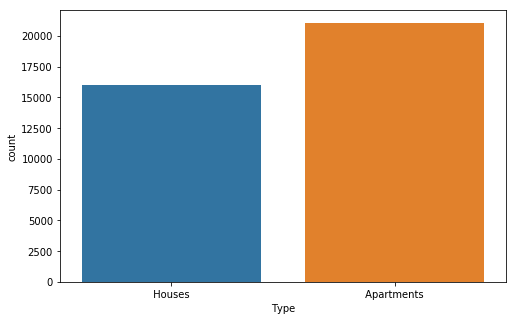

In [34]:
#create a countplot for the type of property
plt.figure(figsize=(8,5))
sns.countplot(x='Type',data=df_new)

In [35]:
#count the number of houses and apartments properties 
df_new['Type'].value_counts()

 Apartments     21043
 Houses         15964
Name: Type, dtype: int64

**In our dataset, apartment property is higher than house. 57% for apartment and 43% for house**

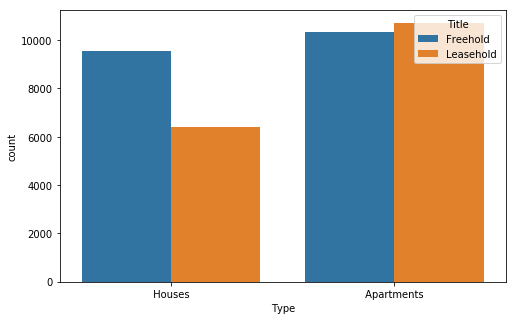

In [36]:
#create a countplot for the title (either freehold/leasehold)
plt.figure(figsize=(8,5))
sns.countplot(x='Type',hue='Title',data=df_new)

**Most of the houses are freehold. Houses with freehold is higher than houses with leasehold. In addition, the number of apartments with leasehold is slightly higher than freehold.**

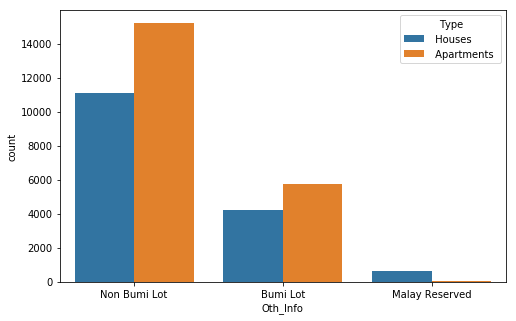

In [37]:
#create a countplot for the Oth_Info 
plt.figure(figsize=(8,5))
sns.countplot(x='Oth_Info',hue='Type',data=df_new)

**Non bumi lot has the highest number properties followed by bumi lot and malay reserved. The number of apartments is higher than houses for non bumi and bumi lot. But there are more houses for malay reserved compare to apartment.**

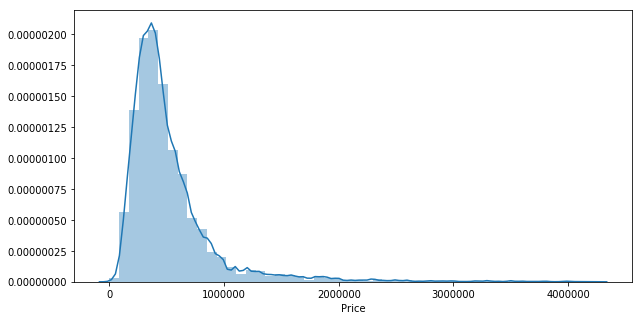

In [38]:
#distribution plot for price after the outliers are removed
plt.figure(figsize=(10,5))
sns.distplot(df_new['Price'])

**After the outliers are removed, the distribution plot for price is improved. Most of the properties have the price within RM 1,000,000.**

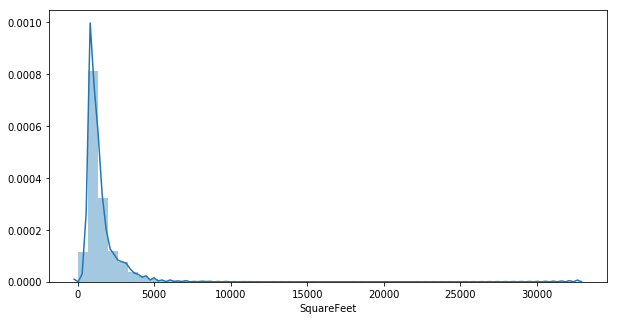

In [39]:
#distribution plot for square feet after the outliers are removed
plt.figure(figsize=(10,5))
sns.distplot(df_new['SquareFeet'])

**After the outliers are removed, the distribution plot for square feet is improved. Most of the properties have the square feet within 5,000 sqft.**

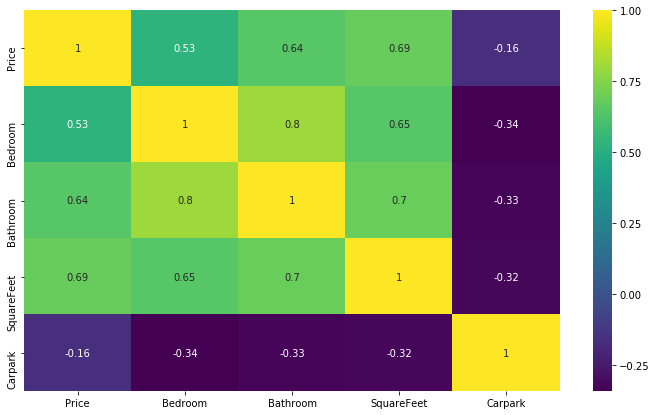

In [40]:
#explore correlation between the continuous feature variables after the outliers are removed
plt.figure(figsize=(12,7))
sns.heatmap(df_new.corr(),annot=True,cmap='viridis')

**After the outliers are removed, the correlation between price and square feet is improved. However, the correlation between bedroom and bathroom is still the highest.**

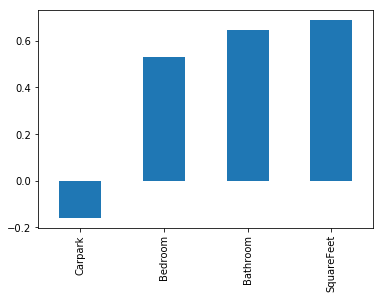

In [41]:
df_new.corr()['Price'].sort_values().drop('Price').plot(kind='bar')

**Now the price and square feet are highly correlated, followed by bathroom and bedroom. Negative correlation between price and carpark.**

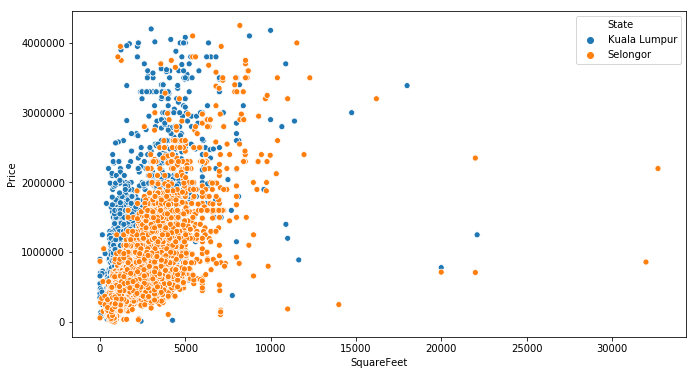

In [42]:
#scatterplot for price and square feet after the outliers are removed
plt.figure(figsize=(11,6))
sns.scatterplot(x='SquareFeet',y='Price',hue='State',data=df_new)

**Scatter plot for square feet and price. When square feet is increased, the price also increased. Another insight we can see from this scatter plot is the price of property in Kuala Lumpur is higher than Selangor.**

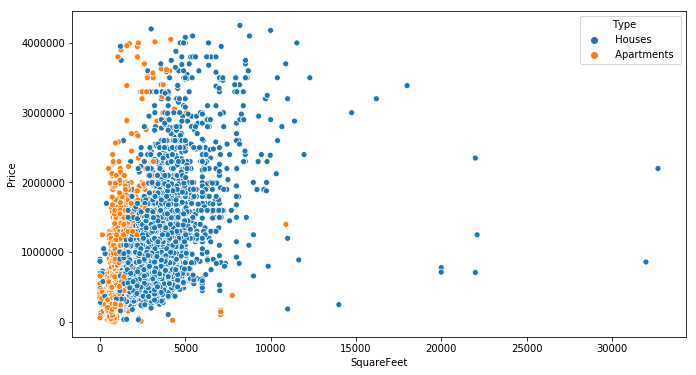

In [43]:
#scatterplot for price and square feet after the outliers are removed
plt.figure(figsize=(11,6))
sns.scatterplot(x='SquareFeet',y='Price',hue='Type',data=df_new)

**Most of the houses have larger square feet than apartments. But the price for most of the apartments are higher than houses for the same square feet.**

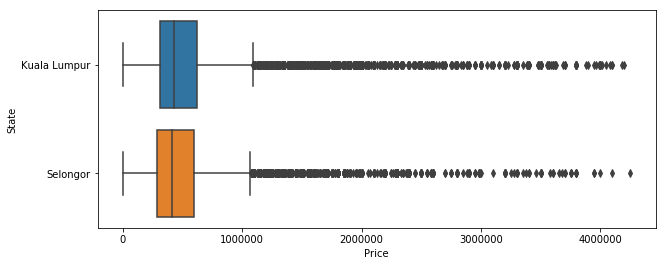

In [44]:
#boxplot for price after the outliers are removed
plt.figure(figsize=(10,4))
sns.boxplot(x='Price',y='State',data=df_new)

**Kuala Lumpur has slightly higher price median than Selangor.**

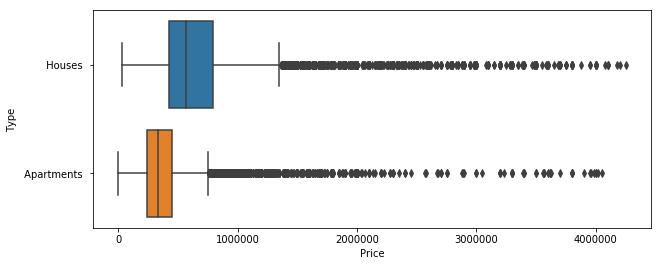

In [45]:
#boxplot for price after the outliers are removed
plt.figure(figsize=(10,4))
sns.boxplot(x='Price',y='Type',data=df_new)

**The price for house has higher maximum, median values than apartment.**

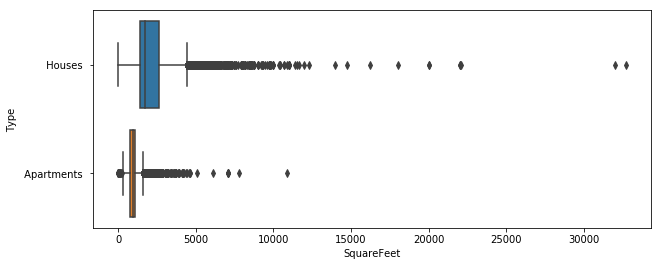

In [46]:
#boxplot for square feet after the outliers are removed
plt.figure(figsize=(10,4))
sns.boxplot(x='SquareFeet',y='Type',data=df_new)

**The square feet for house has higher median, maximum value than apartment.**

<Figure size 360x360 with 0 Axes>

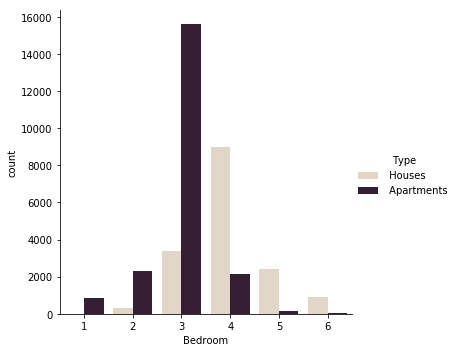

In [47]:
#counter plot for bedroom
plt.figure(figsize=(5,5))
sns.catplot(x="Bedroom", kind="count", hue='Type', palette="ch:.25", data=df_new)

**Most of the properties in our dataset have 3 bedrooms. Besides, most of the apartments have 3 bedrooms and most of the houses have 4 bedrooms.**

<Figure size 360x360 with 0 Axes>

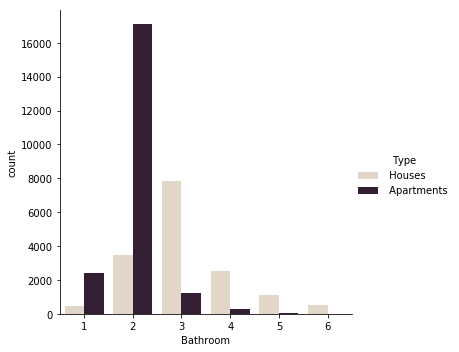

In [48]:
#counter plot for bedroom
plt.figure(figsize=(5,5))
sns.catplot(x="Bathroom", kind="count", hue='Type', palette="ch:.25", data=df_new)

**Most of the apartments have 2 bathrooms and most of the houses have 3 bathrooms.**

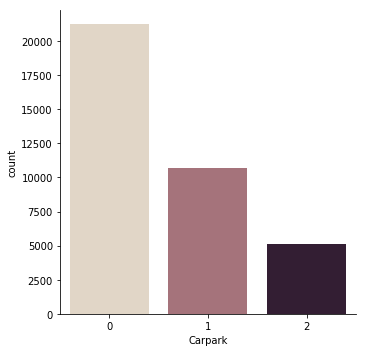

In [49]:
#counter plot for carpark
sns.catplot(x="Carpark", kind="count", palette="ch:.25", data=df_new)

**Most of the properties in our dataset has no carpark data, this come from houses type property.**

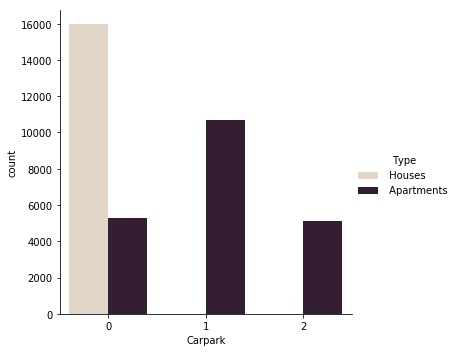

In [50]:
#counter plot for carpark
sns.catplot(x="Carpark", kind="count", hue='Type', palette="ch:.25", data=df_new)

**From the chart above, we can see that all houses property do not have carpark data. Most of the apartments have only 1 carpark.**

In [51]:
#number of unique area
df_new['Area'].nunique()

155

In [52]:
#count for each title
df_new['Area'].value_counts().head(10)

     Cheras             4194
     Shah Alam          1835
     Setapak            1761
     Kajang             1515
     Klang              1443
     Kepong             1389
     Puchong            1382
     Bangi              1101
     Rawang             1075
     Wangsa Maju        1031
Name: Area, dtype: int64

**We have 155 unique area in our dataset, Cheras has the highest number of property.**

In [53]:
df_new.groupby(['Type','State']).median()

Price  Bedroom  Bathroom  SquareFeet  Carpark
Type         State                                                       
 Apartments  Kuala Lumpur  380000        3         2         950        1
             Selongor      269000        3         2         852        1
 Houses      Kuala Lumpur  700000        4         3        1760        0
             Selongor      520000        4         3        1738        0

# Section 2: Predictive Modelling: Linear Regression 
**Build a linear regression model to predict the house price in Klang Valley. Price is the target variable. Type, Title, Other Info and State are categorical variables, encoding categorical variable is needed. Convert these columns: ['Type','Title','Oth_Info','State'] into dummy variables and concatenate them with the original data frame.**

In [54]:
dummies = pd.get_dummies(df_new[['Type','Title','Oth_Info','State']],drop_first=True)
df_dummy = df_new.drop(['Type','Title','Oth_Info','State','Area','Facilities'],axis=1)
df_dummy = pd.concat([df_dummy,dummies],axis=1)
df_dummy.head()

,Price,Bedroom,Bathroom,SquareFeet,Carpark,Type_ Houses,Title_Leasehold,Oth_Info_Malay Reserved,Oth_Info_Non Bumi Lot,State_Selongor
1,3300000,4,3,2379,0,1,0,0,1,0
2,590000,4,2,1065,2,0,1,0,1,0
3,590000,4,2,1065,2,0,1,0,1,0
4,460000,2,2,743,1,0,1,0,1,0
5,300000,3,2,748,1,0,1,0,0,0


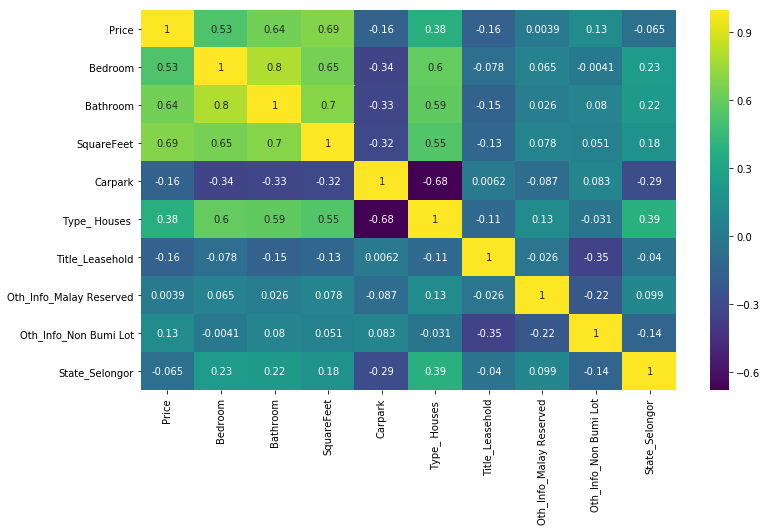

In [55]:
plt.figure(figsize=(12,7))
sns.heatmap(df_dummy.corr(),annot=True,cmap='viridis')

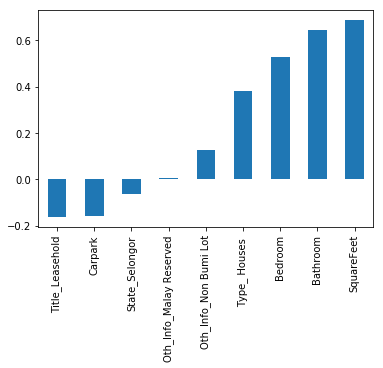

In [56]:
df_dummy.corr()['Price'].sort_values().drop('Price').plot(kind='bar')

**Scaling and Train Test Split. Split the data into 70% for train set and 30% for test set**

In [57]:
#price as target variable
#sqft,bathroom,bedroom,carpark,title,state,oth_info and type as independent variables
X = df_dummy.drop(['Price'],axis=1)
y = df_dummy['Price']

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
scaler = MinMaxScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [62]:
X_train.shape

(25904, 9)

In [63]:
X_test.shape

(11103, 9)

**Training the model. Two model will be used, linear regression and neural network regression.**

In [64]:
#regression model
from sklearn.linear_model import LinearRegression

In [65]:
lm = LinearRegression()

In [66]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [67]:
#ANN regression model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [68]:
model = Sequential()

model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

Instructions for updating:
Colocations handled automatically by placer.


In [69]:
#it will take few minutes to run the ann model
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Instructions for updating:
Use tf.cast instead.
Train on 25904 samples, validate on 11103 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/400
25904/25904 [==============================] - 5s 185us/sample - loss: 438080322956.5707 - val_loss: 319439784728.6016
Epoch 2/400
25904/25904 [==============================] - 1s 39us/sample - loss: 155186541032.2816 - val_loss: 134894303866.3396
Epoch 3/400
25904/25904 [==============================] - 1s 42us/sample - loss: 123034403271.3922 - val_loss: 116055981269.8752
Epoch 4/400
25904/25904 [==============================] - 1s 35us/sample - loss: 105337109217.4824 - val_loss: 100605767306.2949
Epoch 5/400
25904/25904 [==============================] - 1s 37us/sample - loss: 90901670415.4960 - val_loss: 89543902562.6141
Epoch 6/400
25904/25904 [==============================] - 1s 38us/sample - loss: 80980576765.7863 - val_loss: 82994950876.2850
Epoch 7/400
25904/25904 [==============================] - 1s 45us/sample - l

25904/25904 [==============================] - 1s 40us/sample - loss: 58702930918.0679 - val_loss: 70583808424.6146
Epoch 60/400
25904/25904 [==============================] - 1s 39us/sample - loss: 58617221658.8808 - val_loss: 69052052795.1408
Epoch 61/400
25904/25904 [==============================] - 1s 45us/sample - loss: 58752057321.2304 - val_loss: 68864986748.8297
Epoch 62/400
25904/25904 [==============================] - 1s 43us/sample - loss: 58630534706.2829 - val_loss: 68713674209.5189
Epoch 63/400
25904/25904 [==============================] - 1s 44us/sample - loss: 58384055252.3582 - val_loss: 69574386566.3522
Epoch 64/400
25904/25904 [==============================] - 1s 42us/sample - loss: 58450114055.2736 - val_loss: 68496538392.6016
Epoch 65/400
25904/25904 [==============================] - 1s 41us/sample - loss: 58475020384.1384 - val_loss: 68487629540.2165
Epoch 66/400
25904/25904 [==============================] - 1s 37us/sample - loss: 58385469219.8938 - val_loss

25904/25904 [==============================] - 1s 40us/sample - loss: 54174356462.9228 - val_loss: 62046840836.6114
Epoch 123/400
25904/25904 [==============================] - 1s 55us/sample - loss: 54235512955.9679 - val_loss: 61616142595.3432
Epoch 124/400
25904/25904 [==============================] - 1s 42us/sample - loss: 54124439381.2279 - val_loss: 61736689388.7937
Epoch 125/400
25904/25904 [==============================] - 1s 46us/sample - loss: 54351897837.1834 - val_loss: 61221738551.1519
Epoch 126/400
25904/25904 [==============================] - 1s 45us/sample - loss: 54226467383.9753 - val_loss: 61048184899.8793
Epoch 127/400
25904/25904 [==============================] - 1s 40us/sample - loss: 53922240404.4768 - val_loss: 61250114875.5097
Epoch 128/400
25904/25904 [==============================] - 1s 43us/sample - loss: 53931953506.8264 - val_loss: 61277356657.6702
Epoch 129/400
25904/25904 [==============================] - 1s 38us/sample - loss: 53837603386.5052 - v

Epoch 185/400
25904/25904 [==============================] - 1s 43us/sample - loss: 52436054198.1569 - val_loss: 57957118187.7331
Epoch 186/400
25904/25904 [==============================] - 1s 41us/sample - loss: 52631164877.4009 - val_loss: 57862686210.3518
Epoch 187/400
25904/25904 [==============================] - 1s 40us/sample - loss: 52534810252.0964 - val_loss: 60010579757.5372
Epoch 188/400
25904/25904 [==============================] - 1s 37us/sample - loss: 52572234671.6739 - val_loss: 57990491067.2906
Epoch 189/400
25904/25904 [==============================] - 1s 36us/sample - loss: 52505719338.0605 - val_loss: 57912997206.0711
Epoch 190/400
25904/25904 [==============================] - 1s 41us/sample - loss: 52363372979.1526 - val_loss: 57849847722.0441
Epoch 191/400
25904/25904 [==============================] - 1s 35us/sample - loss: 52401031577.8530 - val_loss: 58237857431.2067
Epoch 192/400
25904/25904 [==============================] - 1s 32us/sample - loss: 525513

25904/25904 [==============================] - 1s 43us/sample - loss: 51884416023.4021 - val_loss: 57345626124.1740
Epoch 249/400
25904/25904 [==============================] - 1s 46us/sample - loss: 51925166220.4126 - val_loss: 58159943539.0766
Epoch 250/400
25904/25904 [==============================] - 1s 52us/sample - loss: 51907553417.8826 - val_loss: 57728326415.3789
Epoch 251/400
25904/25904 [==============================] - 1s 40us/sample - loss: 51887951064.9438 - val_loss: 57327003902.7319
Epoch 252/400
25904/25904 [==============================] - 1s 35us/sample - loss: 51815126962.8363 - val_loss: 57781309739.1854
Epoch 253/400
25904/25904 [==============================] - 1s 40us/sample - loss: 51911045734.7795 - val_loss: 57408049188.7065
Epoch 254/400
25904/25904 [==============================] - 1s 50us/sample - loss: 52003737362.1841 - val_loss: 58500884602.6623
Epoch 255/400
25904/25904 [==============================] - 1s 39us/sample - loss: 51801391771.9086 - v

Epoch 311/400
25904/25904 [==============================] - 1s 45us/sample - loss: 51524653759.3280 - val_loss: 57355032142.3471
Epoch 312/400
25904/25904 [==============================] - 1s 41us/sample - loss: 51396067794.7770 - val_loss: 58108923900.6798
Epoch 313/400
25904/25904 [==============================] - 1s 39us/sample - loss: 51577452199.2934 - val_loss: 57512284710.4127
Epoch 314/400
25904/25904 [==============================] - 1s 40us/sample - loss: 51607514963.9629 - val_loss: 57366711478.7023
Epoch 315/400
25904/25904 [==============================] - 1s 38us/sample - loss: 51480453350.2261 - val_loss: 57363027777.4583
Epoch 316/400
25904/25904 [==============================] - 1s 49us/sample - loss: 51478295871.4070 - val_loss: 57291797882.5932
Epoch 317/400
25904/25904 [==============================] - 1s 34us/sample - loss: 51510916235.7801 - val_loss: 57618730132.9471
Epoch 318/400
25904/25904 [==============================] - 1s 35us/sample - loss: 514209

25904/25904 [==============================] - 1s 55us/sample - loss: 51275281146.7820 - val_loss: 57689015700.2324
Epoch 375/400
25904/25904 [==============================] - 1s 51us/sample - loss: 51410434484.4175 - val_loss: 57156192636.3455
Epoch 376/400
25904/25904 [==============================] - 1s 50us/sample - loss: 51354119618.9648 - val_loss: 57220048327.3263
Epoch 377/400
25904/25904 [==============================] - 1s 54us/sample - loss: 51312646074.4262 - val_loss: 57304908912.9785
Epoch 378/400
25904/25904 [==============================] - 1s 46us/sample - loss: 51382120561.8481 - val_loss: 57657914496.6571
Epoch 379/400
25904/25904 [==============================] - 1s 41us/sample - loss: 51596673782.9870 - val_loss: 57763211297.2018
Epoch 380/400
25904/25904 [==============================] - 1s 39us/sample - loss: 51301752467.6862 - val_loss: 57789822958.4768
Epoch 381/400
25904/25904 [==============================] - 1s 40us/sample - loss: 51419894340.6251 - v

In [70]:
losses = pd.DataFrame(model.history.history)

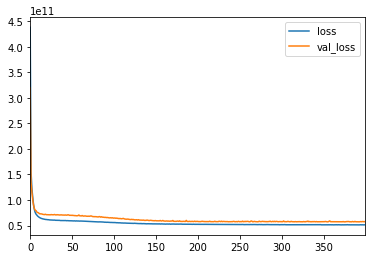

In [71]:
losses.plot()

**Predicting Test Data**

In [72]:
#predict test data using regression model
predictions_lm = lm.predict(X_test)

In [73]:
#predict test data using ANN regression model
predictions_ann = model.predict(X_test)

Text(0, 0.5, 'Predicted Y')

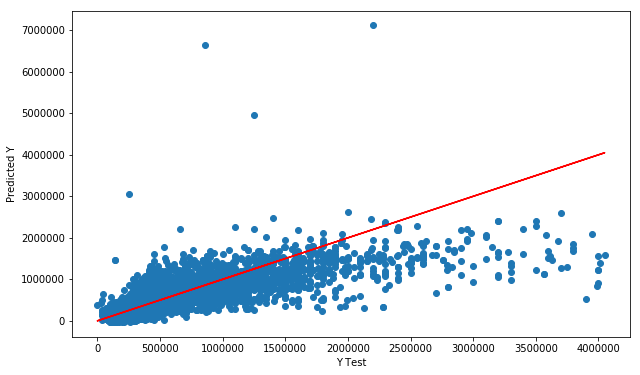

In [74]:
#scatter plot of prediction and y_test for regression model
plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions_lm)
plt.plot(y_test,y_test,'r')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Text(0, 0.5, 'Predicted Y')

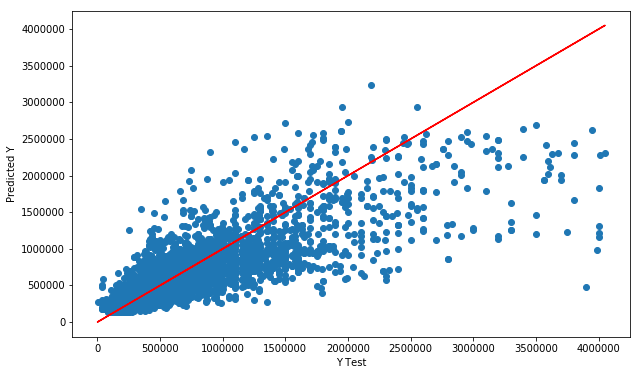

In [75]:
#scatter plot of prediction and y_test for ANN regression model
plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions_ann)
plt.plot(y_test,y_test,'r')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

**Evaluate the model**

In [76]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,explained_variance_score

In [77]:
#evaluate regression model
print('MAE:', mean_absolute_error(y_test, predictions_lm))
print('MSE:', mean_squared_error(y_test, predictions_lm))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions_lm)))
print('R2 error:',r2_score(y_test, predictions_lm))

MAE: 157085.27909580816
MSE: 78417197653.37372
RMSE: 280030.70841137
R2 error: 0.5423206945916141


In [78]:
#evaluate ANN regression model
print('MAE:', mean_absolute_error(y_test, predictions_ann))
print('MSE:', mean_squared_error(y_test, predictions_ann))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions_ann)))
print('R2 error:',r2_score(y_test, predictions_ann))

MAE: 132002.62119050033
MSE: 57780003958.19875
RMSE: 240374.71572151416
R2 error: 0.662768973268143


C:\Users\ASUS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


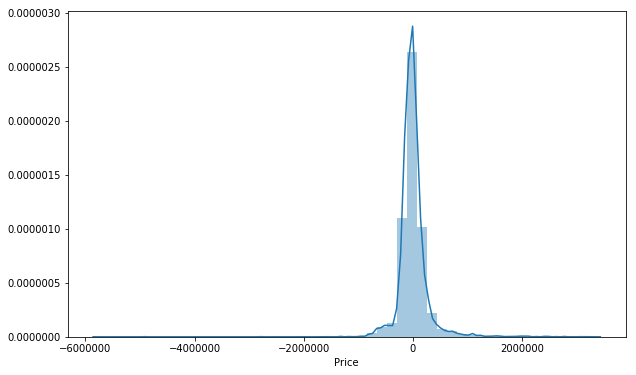

In [79]:
plt.figure(figsize=(10,6))
sns.distplot((y_test-predictions_lm),bins=50)

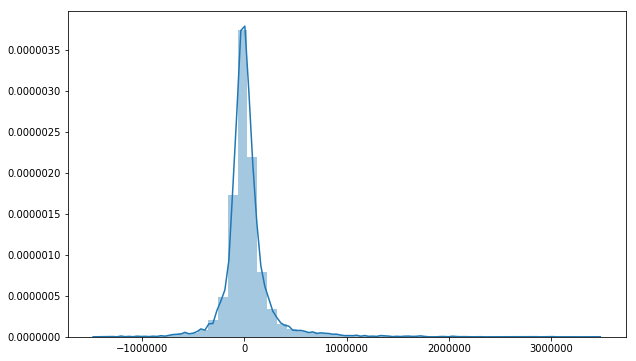

In [80]:
plt.figure(figsize=(10,6))
sns.distplot((y_test.values.reshape(11103, 1)-predictions_ann),bins=50)

**Predicting on a brand new house**

In [81]:
new_house = df_dummy.drop('Price',axis=1).iloc[233]

In [82]:
new_house= scaler.transform(new_house.values.reshape(-1,9))

In [83]:
new_house

array([[0.8       , 0.8       , 0.19473612, 0.        , 1.        ,
        1.        , 0.        , 1.        , 0.        ]])

In [84]:
model.predict(new_house)

array([[1699540.1]], dtype=float32)

In [85]:
lm.predict(new_house)

array([1535754.53614986])

In [86]:
df_dummy.iloc[233]

Price                      2000000
Bedroom                          5
Bathroom                         5
SquareFeet                    4285
Carpark                          0
Type_ Houses                     1
Title_Leasehold                  1
Oth_Info_Malay Reserved          0
Oth_Info_Non Bumi Lot            1
State_Selongor                   0
Name: 245, dtype: int64